In [14]:
library(tidyverse)

The broad research question guiding this project is: 

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

The specific question is: 

Can time spent on the game and a person’s skill level be used to predict whether or not they would subscribe to a game-related newsletter, using the players dataset?

In answering the above question, we will be using the data players.csv and sessions.csv, loaded below. To answer this question, we need the variables of a player's skill level, time spent on the game, and whether or not they subscribed to the newsletter in-game; all of which can be found in the players.csv and sessions.csv data. Before addressing the question, the data must be tidied in order for observations to be made. 

The data used in this project come from two related sources: a player dataset and a sessions dataset. The players dataset contains information about each player’s demographics and game-related attributes, including their name, gender, age, experience level, total hours played, and whether they subscribed to the game-related newsletter. The sessions dataset records detailed information about individual play sessions, including the start and end times for each session. Both datasets are linked using a unique hashedEmail identifier that allows a player's characteristics to be connected with the time they spent on the game. 

The variables in these datasets represent a combination of different aspects of a player that can be observed. The main variables include experience ( player skill level), played_hours (numeric measure of total hours played), Age (numeric), gender (categorical), and subscribe (whether or not they agreed to a newsletter subscription from the game). In the sessions data, start_time and end_time capture when each play session occurred, allowing the calculation of minutes_played for each session.

In [15]:
players<- read_csv("players.csv") 
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47




players.csv

- Number of observations: 196  
- Number of variables: 7  
- Description: Contains player demographic information, experience level, playtime, and newsletter subscription status.

| Variable | Type | Description | Example | Issues / Notes |
|-----------|------|-------------|----------|----------------|
| experience | Categorical | Player’s experience or skill level | "Pro", "Amateur", "Regular" | Unequal group sizes likely |
| subscribe | Logical (TRUE/FALSE) | Indicates if player subscribed to the newsletter | TRUE, FALSE | May be unbalanced |
| hashedEmail | Character | Unique anonymized player ID | f6daba42... | Used for merging |
| played_hours | Numeric | Total hours played (self-reported or logged) | 30.3 | Outliers possible |
| name | Character | Player name or alias | "Morgan" | Duplicates possible |
| gender | Character | Gender identity of the player | "Male", "Female", "Other" | May lack diversity categories |
| Age | Numeric | Player age (years) | 9–21 | 2 missing values detected |

- Each row = one observation (one player).

- Each column = one variable (age, experience, etc.).

- Each cell = one value.
-  A small number of missing values were present in the Age column. Since they do not affect the key variables used for analysis (played_hours, experience, and subscribe), they were left in the dataset.


The mean value for each quantitative variable (average hours played, average age) in the players.csv data set are shown below:

In [16]:
mean<- players |>  
summarize("average hours played" = mean(played_hours,na.rm = TRUE), "average age" = mean(Age,na.rm = TRUE))
mean


average hours played,average age
<dbl>,<dbl>
5.845918,21.13918


`summarise()` has grouped output by 'experience', 'played_hours'. You can
override using the `.groups` argument.


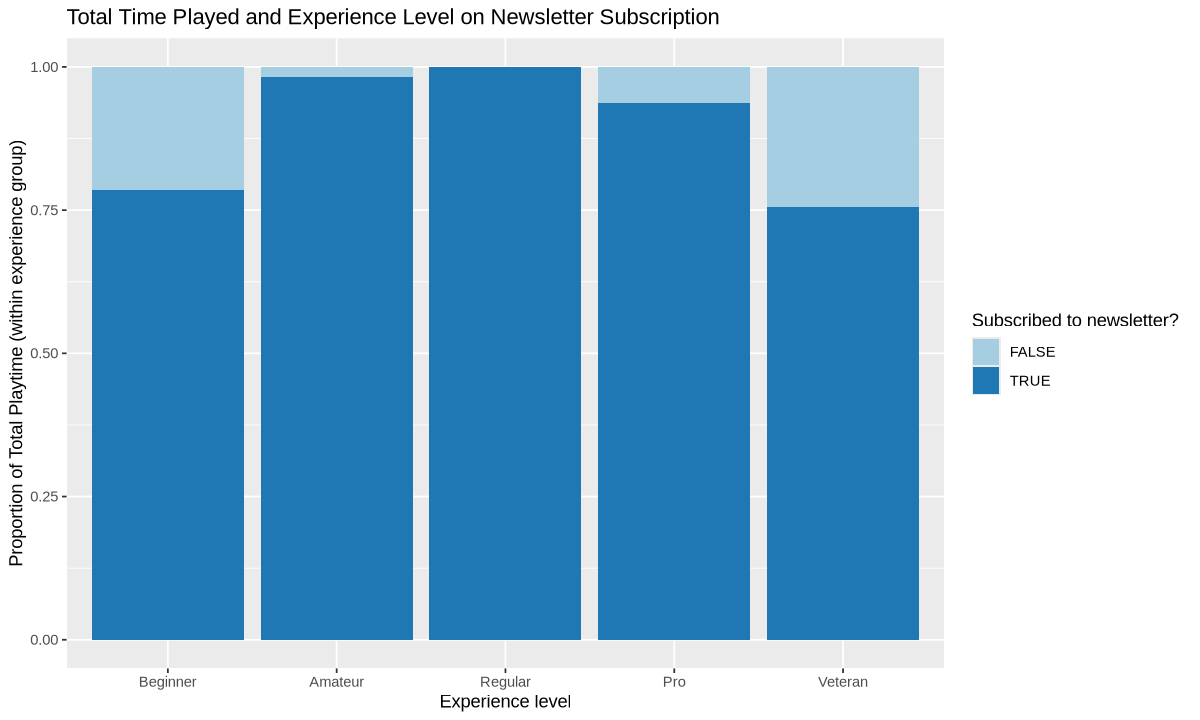

In [17]:
#arrange skill level from left to right for the plot
players_tidy <- players |>
  mutate(
    experience = factor(
      experience,
      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
players_plot <- players_tidy|> 
group_by(experience, played_hours, subscribe) |>
summarise(total_hours = sum(played_hours, na.rm = TRUE))|>
ggplot(aes(x = experience, y = total_hours, fill = subscribe)) + 
geom_bar(stat = "identity", position = "fill") + 
scale_fill_brewer(palette = "Paired") +
labs(title = "Total Time Played and Experience Level on Newsletter Subscription", x = "Experience level", y = "Proportion of Total Playtime (within experience group)", fill = "Subscribed to newsletter?")
players_plot

options(repr.plot.width = 10, repr.plot.height = 6)

- The proportional bar chart above comparing subscription rates across experience levels shows that the highest proportion of subscriptions when observing total playtime is at the "regular" experience level before plateuing. At Beginner and Veteran levels, the proportion of people who are subscribed are almost identical.

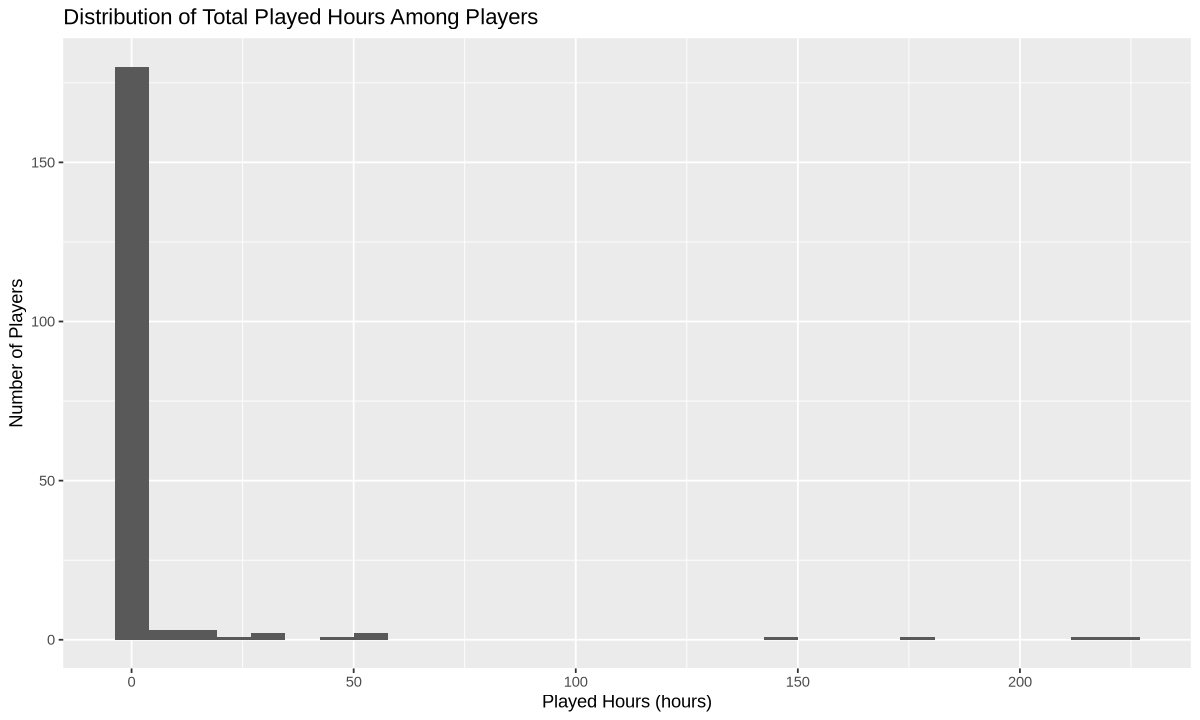

In [18]:
ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Total Played Hours Among Players",
       x = "Played Hours (hours)", y = "Number of Players") 

- The distribution is heavily right-skewed. Most players have played very few hours, while a small number of players have played a lot (outliers).

- This suggests that most players are casual, and only a few are highly engaged.

- Since the research question involves whether playtime predicts newsletter subscription, this plot reveals that playtime has a wide range, meaning it could be a meaningful predictor.

- A few extreme outliers in played_hours may skew the distance calculations in the kNN classification model, reducing its accuracy. Since kNN depends on Euclidean distances, variables with large scales can dominate the model. Before modeling, playtime values will need to be standardized or transformed to ensure all predictors contribute equally to the classification task.

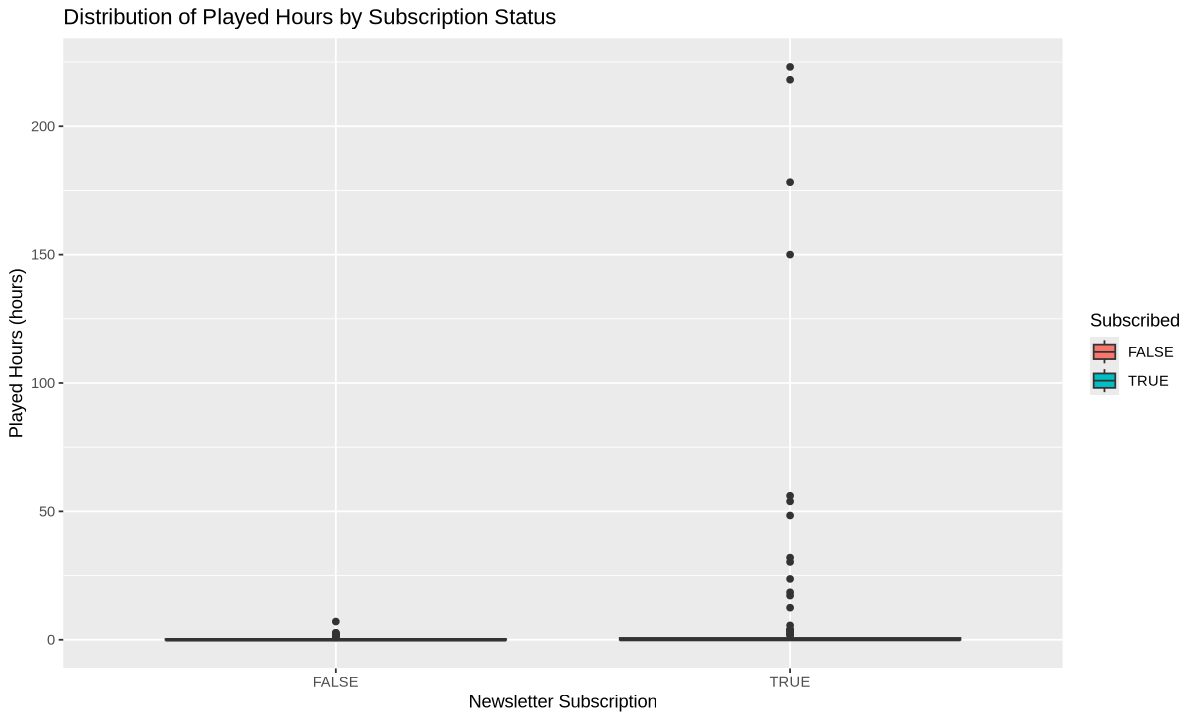

In [19]:
ggplot(players_tidy, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Distribution of Played Hours by Subscription Status",
       x = "Newsletter Subscription",
       y = "Played Hours (hours)",
       fill = "Subscribed") 

- The plot shows that both subscribers and non-subscribers have very low played hours on average, but there are a few extreme outliers with very high playtime (over 200 hours).
- The median played hours appear slightly higher for players who subscribed, suggesting that more active players may be more likely to subscribe to the newsletter. However, the presence of these extreme outliers makes it hard to see a clear relationship
- Similar to the histogram above, the few outliers in the data with extremely high playtime causes the relationships and trends to be less clear. Further, it can affect the knn-classification model later on during analysis. Therefore, it needs to be addressed before knn is implimented.

In [20]:
sessions<- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


sessions.csv

- Number of observations: 1,535  
- Number of variables: 5  
- Description: Contains time-stamped records of individual game sessions for each player.

| Variable | Type | Description | Example | Issues / Notes |
|-----------|------|-------------|----------|----------------|
| hashedEmail | Character | Player ID used to merge with players.csv | bfce39c8... | Consistent between players.csv and sessions.csv |
| start_time | Character (Datetime) | Session start time (day/month/year hour:minute) | "30/06/2024 18:12" | Needs conversion to a format where it is usable |
| end_time | Character (Datetime) | Session end time | "30/06/2024 18:24" | 2 missing values |
| original_start_time | Numeric | Epoch time (milliseconds) for start | 1.71977e+12 | Redundant with start_time |
| original_end_time | Numeric | Epoch time (milliseconds) for end | 1.71977e+12 | Redundant with end_time |

We can tidy the original sessions data by:

- Calculating a new variable called minutes_played by subtracting start_time from end_time and converting the result into minutes.

- Removing redundant columns such as original_start_time and original_end_time once the duration has been calculated, as these values provide no relevant information to the question being answered.

- Keeping only the relevant columns hashedEmail and minutes_played, which will be used later to calculate the total time each player spent in the game.

In [21]:
#tidying sessions data
sessions_tidy <- sessions |>
  mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
        end_time   = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
minutes_played = as.numeric(end_time - start_time, units = "mins"))|> 
select(hashedEmail, minutes_played)

sessions_tidy

hashedEmail,minutes_played
<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,122
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,9
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,17
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,18


Model (methods and plans): 

Proposed Method: k-Nearest Neighbours (kNN) classficiation

The k-nearest neighbours (kNN) classification algorithm will be used to predict whether a player subscribes to the game-related newsletter based on their total time spent playing and their experience level. This method classifies each player by comparing them to the most similar players (neighbours) in terms of playtime and skill level, and assigns the majority subscription status among those neighbours.

Why this method is appropriate:

- The outcome variable (subscribe) is binary, and kNN is a flexible method suitable for classification problems.
- It does not assume a specific functional relationship between predictors and the outcome, which is useful if the relationship between playtime and subscription likelihood is nonlinear.
- It can capture complex patterns, such as groups of players with similar behaviours showing similar subscription tendencies.

Assumptions required:

- Players who are close to each other in feature space (similar playtime and experience) are assumed to have similar outcomes.
- Data must be scaled so that variables with larger numeric ranges (like played_hours) do not dominate the distance calculations.
- The data should not contain excessive noise, and features should be relevant to the outcome.

Potential limitations:

- kNN can be sensitive to outliers and irrelevant features.
- It can perform poorly if the dataset is highly imbalanced or contains many irrelevant variables.
- Model interpretability can be limited compared to methods like logistic regression.
- Becomes very slow as the training data gets larger
- May not perform well with large number of predictors 


Model selection:
- The optimal number of neighbours (k) will be chosen using cross-validation to balance bias and variance. This is also important in order to prevent overfitting, which will visualize trends that may not actually be present.
- Continuous variables will need to be standardized (scaled and centered) so that distances are measured fairly between features.
- The data will be split into training and testing sets before modelling, with a 75/25 proportion.
Five-fold cross-validation will be performed on the training data to select the best k value and assess model stability.
- The final model will be tested on the 25%  test set to evaluate predictive performance.


Evaluating the kNN classification model: 
- Accuracy: Measures the overall proportion of correct predictions made by the model. In this dataset, accuracy will show how well the kNN classifier correctly identifies both subscribers and non-subscribers. It gives a general idea of model performance but may be less reliable if the classes are unbalanced.
- Precision: Indicates how many of the players predicted to subscribe actually did subscribe. In this dataset, higher precision means the model is effective at correctly identifying true subscribers without falsely labeling non-subscribers as subscribers.
- Recall: Measures how many of the actual subscribers were correctly identified by the model. In this dataset, a high recall value means the model successfully captures most of the players who truly subscribed to the newsletter, even if it occasionally misclassifies some non-subscribers.

Note: It is difficult to achieve both high precision and high recall at the same time; models with high precision tend to have low recall and vice versa.
